# Happy Customer Project

As one of the fastest-growing startups in the logistics and delivery domain, we believe that happy customers are essential to our success. Therefore, it is crucial to analyze their feedback about our services, identify areas of dissatisfaction, and propose solutions to address these drawbacks effectively.

Gathering feedback from customers is always a challenging task. Collecting sufficient data, analyzing feedback, and drawing meaningful insights require significant resources. For small companies like ours, it may not always be feasible to gather enough data and conduct a comprehensive analysis.

The limited amount of feedback presents a significant challenge for analytics. Misinterpreting the available data could have a counterproductive effect on performance, potentially making customers even more dissatisfied.

Therefore, it is crucial to approach analytics with sensitivity, handle the data with extra caution, and provide robust justification for the accuracy and generalizability of our analyses and predictive models.

In this report, we present a comprehensive and systematic analysis of our recently gathered customer feedback. Additionally, we introduce a generalized and accurate predictive model that can forecast customer satisfaction based on their feedback and rank the most crucial features that customers prioritize when engaging with our company.

Through this report, we first present the results of exploratory data analysis derived from the feedback data we gathered. Next, we discuss various potential predictive models capable of making efficient predictions based on the characteristics of our dataset. Finally, we provide the prediction results using the best-selected models, evaluated from two key perspectives: accuracy and generalization.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the first step we take to understand the quality and quantity of our gathered data and uncover patterns. Through this type of analysis, we identify missing data, redundant entries, and outliers. Additionally, we analyze the dependency among input features to ensure they are sufficiently independent, which is critical for reliable analysis and modeling.

In [456]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend inline version unknown.


In [458]:
import warnings
warnings.filterwarnings("ignore")

In [460]:
#load the data
happy_unhapp_feedback= pd.read_csv(r"ACME-HappinessSurvey2020.csv")

### Understand the DATA

In this section, we preview the data shape, head, tail, and the distribution of our data.

In [463]:
# View first 5 rows of the data
happy_unhapp_feedback.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [465]:
# View last 5 rows of the data
happy_unhapp_feedback.tail()

,Y,X1,X2,X3,X4,X5,X6
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


Printing a few rows of the data provides an essential overview of the dataset, such as its structure, potential data entry issues, and formatting problems. It offers an early glimpse into the data, helping to uncover significant issues before proceeding with more complex analyses.
As is evident, our data does not show any inconsistencies in the preview section, allowing us to proceed to the next phase of analysis.

In [468]:
# Print number of rows and columns (data dimension)

print(f"Rows count: {happy_unhapp_feedback.shape[0]}, Columns count: {happy_unhapp_feedback.shape[1]}")

Rows count: 126, Columns count: 7


The dataset contains 126 samples that represents the relationship between 6 features and customers happyness.

### Get data description
In this section, we analysis the dataset to determine wheter it contains null value set for each feature.

In [472]:
happy_unhapp_feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


The analysis determined that none of the dataset's features or outputs contain null values, so there is no need to implement a null value handling strategy.

### Data Description Analysis

In this section, we get a description about the distribution of the data in each column. This analysis reveal the outliers in values.

In [476]:
happy_unhapp_feedback.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


By analysing the data description, we can suggest following findings from the data,
- Since the target variable Y has two possible outcomes, 1 (happy) and 0 (unhappy)—an ideal mean value of 0.5 would indicate an equal number of samples for both outcomes. However, the mean value of Y is 0.547, suggesting a slight imbalance in the data distribution. This highlights the need for increased caution to prevent bias in the predictions of the designed model.
- For input features, the mean and median (50th percentile) are slightly departed from each other.
- For features X1 and X6, the data distribution is very narrow and the variability is low. Which may indicates that features X1 and X6 have lower effect on the prediction and their value may not provide enough insight to the output.
- For some features the distance between max and 75th quartile is large like feature X2. In contrast, for some other features such as X1,X3,X4,X5, and X6 the distance between min and 25th quartile is large. That may indicates outliers in the input, which requires more investigation.

### Identify features with low variance

In [480]:
x= happy_unhapp_feedback.iloc[:,1:]

variances = [{col:x[col].var()} for col in x.columns]
variances

[{'X1': 0.64},
 {'X2': 1.2429841269841277},
 {'X3': 1.0474285714285732},
 {'X4': 0.7669841269841263},
 {'X5': 1.3170793650793648},
 {'X6': 0.6549841269841268}]

The variance of a feature reflects its variability, which can indicate how dispersed its values are. Features with higher variability are often considered more informative, as they tend to contain more distinct values and, therefore, potentially more information. This concept is rooted in Shannon entropy theory, which suggests that features with greater variability have higher entropy, representing more uncertainty and, consequently, more information content.

Based on this theory, features can be ranked by their variance to estimate their importance. This ranking assumes that features with higher variance are more likely to contribute meaningful information to a machine learning model.

    1- X5
    2- X2
    3- X3
    4- X4
    5- X6
    6- X1


### Analysing the correlation between features
The intense correlation between two or more features may lead to overfit in linear regression. Therefore, here we represent the correlation between features.

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001696B4D8050>


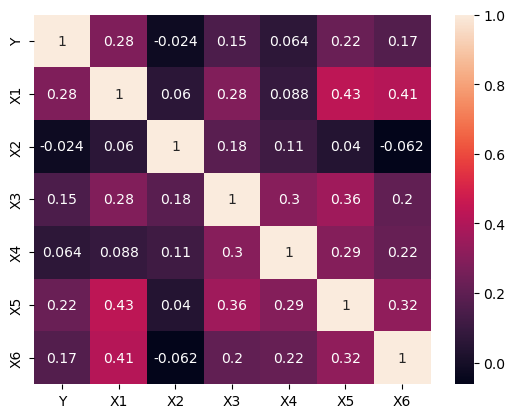

In [484]:
corr=happy_unhapp_feedback.select_dtypes("number").corr()
sns.heatmap(corr,annot=True)
plt.show()

The high correlation between features often provides evidence that one of the features might be redundant. However, the highest absolute correlation in our case occurs between features X1 and X5, with a value of 0.43. This correlation is relatively low and does not fall into the range classified as high (|r| > 0.9) or moderate (0.7 ≤ |r| ≤ 0.9). Therefore, we can confidently conclude that the correlation between features in this dataset does not introduce redundancy or perturb our predictions.

### Analysing features distribtuion and outliers

By analysing the data description, we can suggest following findings from the data,
- Since the target variable Y has two possible outcomes, 1 (happy) and 0 (unhappy), an ideal mean value of 0.5 would indicate an equal number of samples for both outcomes. However, the mean value of Y is 0.547, suggesting a slight imbalance in the data distribution. This highlights the need for increased caution to prevent bias in the predictions of the designed model.
- For input features, the mean and median (50th percentile) are slightly departed from each other.
- For features X1 and X6, the data distribution is very narrow and the variability is low. Which may indicates that features X1 and X6 have lower effect on the prediction and their value may not provide enough insight to the output.
- For some features the distance between max and 75th quartile is large like feature X2. In contrast, for some other features such as X1,X3,X4,X5, and X6 the distance between min and 25th quartile is large. That may indicates outliers in the input, which requires more investigation.

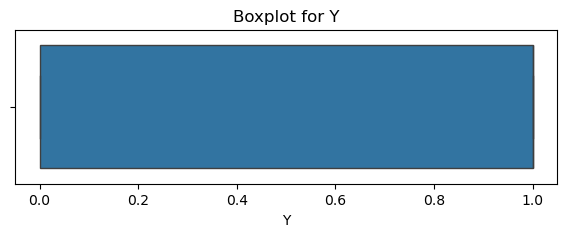

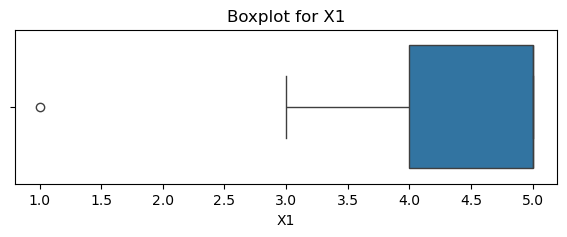

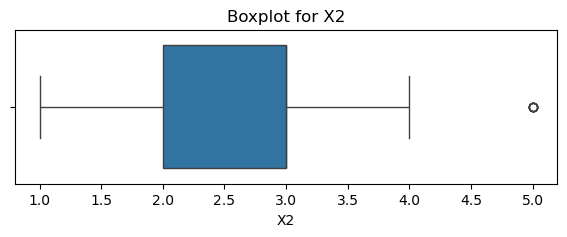

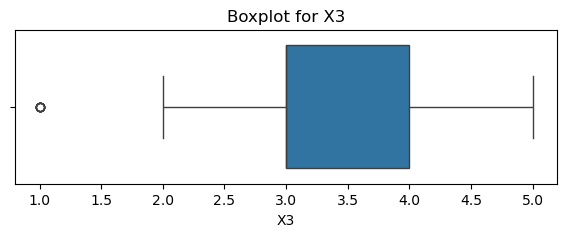

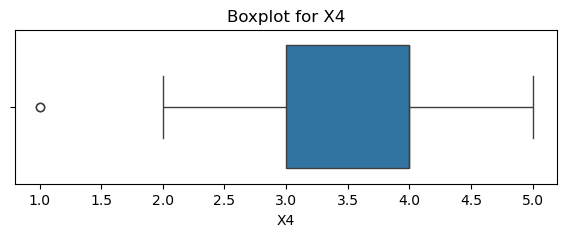

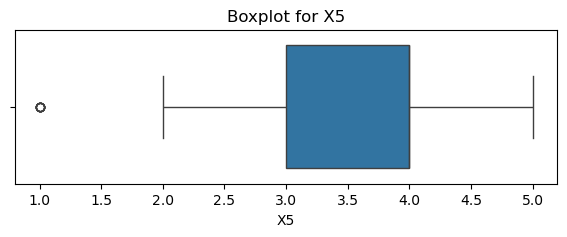

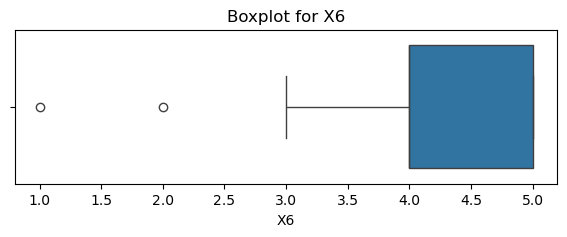

In [488]:
#boxplot
for feature in happy_unhapp_feedback.columns:
    plt.figure(figsize=(7, 2))  
    sns.boxplot(data=happy_unhapp_feedback, x=feature)
    plt.title(f"Boxplot for {feature}")  
    plt.xlabel(feature)  
plt.show()

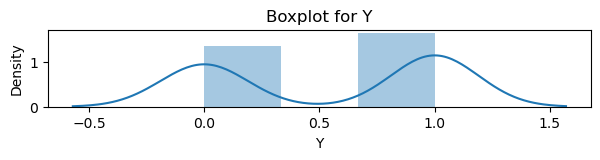

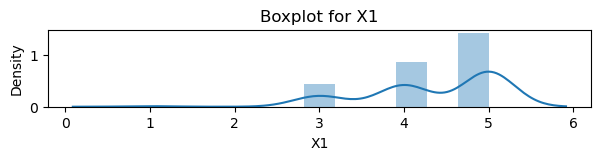

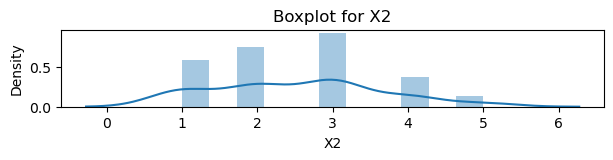

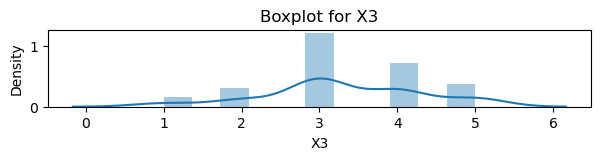

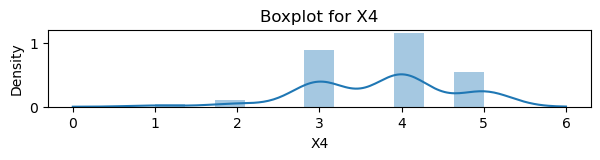

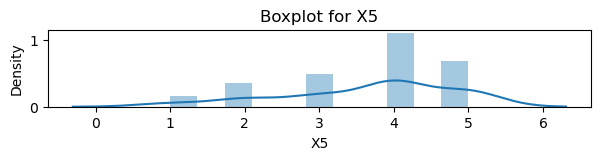

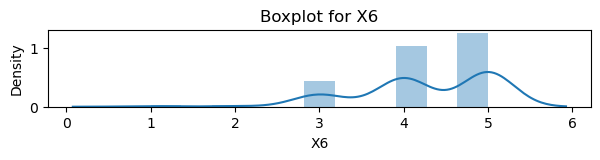

In [489]:
#display data distribution
for feature in happy_unhapp_feedback:
    plt.figure(figsize=(7,1))
    sns.distplot(happy_unhapp_feedback[feature])
    plt.title(f"Boxplot for {feature}")  
    plt.xlabel(feature)  
plt.show()

### Average answers to each questions for happy/unhappy customers
We compute the average answers of customers for questions we asked. The most meaningfull differences are
observed for question 1, 3,5 and 6.

In [493]:
# Group data by 'Y' and compute the mean for each group
grouped_averages = happy_unhapp_feedback.groupby('Y').mean()

# Extract averages for Y=0 and Y=1
averages_y0 = grouped_averages.loc[0]
averages_y1 = grouped_averages.loc[1]

# Combine the results into a summary DataFrame
summary_df = pd.DataFrame({
    'Feature': happy_unhapp_feedback.columns[1:],  # Exclude 'Y' itself
    'Average (Y=0)': averages_y0.values,  # Exclude the 'Y' column
    'Average (Y=1)': averages_y1.values  # Exclude the 'Y' column
})

summary_df.reset_index(drop=True, inplace=True)

# Display the summary DataFrame
print(summary_df)


  Feature  Average (Y=0)  Average (Y=1)
0      X1           4.09           4.54
1      X2           2.56           2.51
2      X3           3.14           3.45
3      X4           3.68           3.80
4      X5           3.37           3.88
5      X6           4.11           4.38


### Features relationship with the label

#### How we can rank the mutual information between each question and the satisfaction state?

We compute the mutual information between features and the output for 10 different seeds. The results suggest
that the feature X2 has 0 mutual information with the output and we can remove it from input sets.

In [497]:
# To have a generalized prediction results we run model selection one a set of random seeds
random_states=[392, 406, 393, 221, 845, 638, 226, 958, 660, 491] #[i for i in range(1000)]#np.random.randint(1,1000,100) #Generate 100 random values to set for models random seed and get the average of them]

In [499]:
from sklearn.feature_selection import mutual_info_classif

x= happy_unhapp_feedback.iloc[:,1:]
y=happy_unhapp_feedback.iloc[:,0]


all_random_seeds_mutual_info=[]
for state in random_states:
    mutual_info=mutual_info_classif(x,y,random_state=state)
    all_random_seeds_mutual_info.append(mutual_info)
#Get the average of metrics across all runs
#combined_results_mutual_info=pd.concat(all_random_seeds_mutual_info)#.reset_index()
#print(all_random_seeds_mutual_info[0].shape)
mutual_info_df = pd.DataFrame(all_random_seeds_mutual_info, columns=x.columns)

#importance=pd.Series(mutual_info,index=x.columns).reset_index().sort_values(by=0,ascending=False)

In [501]:
mutual_info_df

,X1,X2,X3,X4,X5,X6
0,0.00,0.00,0.00,0.07,0.00,0.02
1,0.07,0.00,0.02,0.02,0.06,0.04
2,0.03,0.00,0.00,0.03,0.00,0.03
3,0.07,0.00,0.03,0.04,0.02,0.00
4,0.08,0.00,0.00,0.00,0.00,0.03
5,0.03,0.00,0.00,0.00,0.01,0.00
6,0.13,0.00,0.00,0.03,0.00,0.01
7,0.02,0.00,0.00,0.01,0.01,0.11
8,0.07,0.00,0.00,0.02,0.00,0.01
9,0.08,0.00,0.00,0.06,0.07,0.06


In [503]:
mutual_info_df.describe()

,X1,X2,X3,X4,X5,X6
count,10.00,10.00,10.00,10.00,10.00,10.00
mean,0.06,0.00,0.01,0.03,0.02,0.03
std,0.04,0.00,0.01,0.02,0.02,0.03
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.03,0.00,0.00,0.01,0.00,0.01
50%,0.07,0.00,0.00,0.02,0.01,0.02
75%,0.08,0.00,0.00,0.04,0.02,0.03
max,0.13,0.00,0.03,0.07,0.07,0.11


By analyzing mutual information classification, which measures the reduction in uncertainty (entropy) of one variable given knowledge of another variable, we identify that features X4 and X6 contribute the least to predicting the output. As a result, we can confidently consider removing these features from our feature list. To ensure this decision is optimal, we will run our selected models both with and without these features and compare the results.

### Use Lazy Predict to find best models for the data

In this section, we first utilize Lazy Predict framework to get suggestion about the best models which can provide
better fit with our models. To justify the decision regarding feature X2, we train lazy predict in two conditions
with/without feature X2. To provide better generalization, we train lazy predict with 10 different random seed.

In [507]:
# Filter out non-important features
new_dataset=happy_unhapp_feedback.drop(["X2"],axis=1)

In [509]:
x= new_dataset.iloc[:,1:].values
y=new_dataset.iloc[:,0].values

In [511]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [513]:
import os

In [515]:
os.environ["PYTHONWARNINGS"] = "ignore"
warnings.filterwarnings("ignore")

In [517]:
all_random_seeds_results=[]
logging.getLogger("lightgbm").setLevel(logging.ERROR)
for state in random_states:
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=state)
    lazy_classifier=LazyClassifier(verbose=-1,ignore_warnings=True, custom_metric=None,random_state=state)
    models,predictions=lazy_classifier.fit(X_train,X_test,Y_train,Y_test)
    models["random_seed"]=state
    #print(models)
    #input("fe")
    all_random_seeds_results.append(models)
#Get the average of metrics across all runs
combined_results_drop_x2=pd.concat(all_random_seeds_results)#.reset_index()

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 52.21it/s]


In [519]:
grouped_combined_results_drop_x2=combined_results_drop_x2.groupby(combined_results_drop_x2.index).mean().sort_values(by=["Accuracy"],ascending=False).iloc[:,0:5]
grouped_combined_results_drop_x2

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.77,0.77,0.77,0.77,0.02
BernoulliNB,0.75,0.73,0.73,0.74,0.01
NuSVC,0.74,0.74,0.74,0.74,0.01
RandomForestClassifier,0.73,0.73,0.73,0.74,0.12
LabelPropagation,0.72,0.72,0.72,0.72,0.01
GaussianNB,0.72,0.70,0.70,0.72,0.01
SVC,0.72,0.72,0.72,0.71,0.01
XGBClassifier,0.71,0.70,0.70,0.71,0.05
RidgeClassifier,0.70,0.69,0.69,0.70,0.01


### Train lazy predict with all features

In [523]:
x= happy_unhapp_feedback.iloc[:,1:].values
y=happy_unhapp_feedback.iloc[:,0].values

In [527]:
all_random_seeds_results=[]
for state in random_states:
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=state)
    lazy_classifier=LazyClassifier(verbose=-100,ignore_warnings=True, custom_metric=None,random_state=state)
    models,predictions=lazy_classifier.fit(X_train,X_test,Y_train,Y_test)
    models["random_seed"]=state
    #print(models)
    #input("fe")
    all_random_seeds_results.append(models)
#Get the average of metrics across all runs
combined_results_all_features=pd.concat(all_random_seeds_results)#.reset_index()
grouped_combined_results_all_features=combined_results_all_features.groupby(combined_results_all_features.index).mean().sort_values(by=["Accuracy"],ascending=False).iloc[:,0:5]
grouped_combined_results_all_features

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 52.66it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.75,0.75,0.75,0.75,0.02
BernoulliNB,0.74,0.72,0.72,0.74,0.01
GaussianNB,0.72,0.70,0.70,0.71,0.01
LinearDiscriminantAnalysis,0.71,0.69,0.69,0.71,0.01
SVC,0.71,0.70,0.70,0.71,0.01
RidgeClassifierCV,0.71,0.69,0.69,0.71,0.01
RidgeClassifier,0.71,0.69,0.69,0.71,0.01
LogisticRegression,0.71,0.69,0.69,0.71,0.01
LinearSVC,0.71,0.69,0.69,0.71,0.01


In [529]:
grouped_combined_results_all_features=grouped_combined_results_all_features.reset_index()
grouped_combined_results_all_features

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
0,LGBMClassifier,0.75,0.75,0.75,0.75,0.02
1,BernoulliNB,0.74,0.72,0.72,0.74,0.01
2,GaussianNB,0.72,0.70,0.70,0.71,0.01
3,LinearDiscriminantAnalysis,0.71,0.69,0.69,0.71,0.01
4,SVC,0.71,0.70,0.70,0.71,0.01
5,RidgeClassifierCV,0.71,0.69,0.69,0.71,0.01
6,RidgeClassifier,0.71,0.69,0.69,0.71,0.01
7,LogisticRegression,0.71,0.69,0.69,0.71,0.01
8,LinearSVC,0.71,0.69,0.69,0.71,0.01
9,XGBClassifier,0.71,0.70,0.70,0.71,0.05


In [531]:
grouped_combined_results_drop_x2=grouped_combined_results_drop_x2.reset_index()
grouped_combined_results_drop_x2

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
0,LGBMClassifier,0.77,0.77,0.77,0.77,0.02
1,BernoulliNB,0.75,0.73,0.73,0.74,0.01
2,NuSVC,0.74,0.74,0.74,0.74,0.01
3,RandomForestClassifier,0.73,0.73,0.73,0.74,0.12
4,LabelPropagation,0.72,0.72,0.72,0.72,0.01
5,GaussianNB,0.72,0.70,0.70,0.72,0.01
6,SVC,0.72,0.72,0.72,0.71,0.01
7,XGBClassifier,0.71,0.70,0.70,0.71,0.05
8,RidgeClassifier,0.70,0.69,0.69,0.70,0.01
9,LogisticRegression,0.70,0.69,0.69,0.70,0.01


In [533]:
three_best_all_features= grouped_combined_results_all_features[grouped_combined_results_all_features["Model"].isin(["BernoulliNB","LGBMClassifier","SVC"])]

In [535]:
three_best_all_features

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
0,LGBMClassifier,0.75,0.75,0.75,0.75,0.02
1,BernoulliNB,0.74,0.72,0.72,0.74,0.01
4,SVC,0.71,0.70,0.70,0.71,0.01


In [537]:
three_best_all_features_except_x2= grouped_combined_results_drop_x2[grouped_combined_results_drop_x2["Model"].isin(["BernoulliNB","LGBMClassifier","SVC"])]

In [539]:
three_best_all_features_except_x2

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
0,LGBMClassifier,0.77,0.77,0.77,0.77,0.02
1,BernoulliNB,0.75,0.73,0.73,0.74,0.01
6,SVC,0.72,0.72,0.72,0.71,0.01


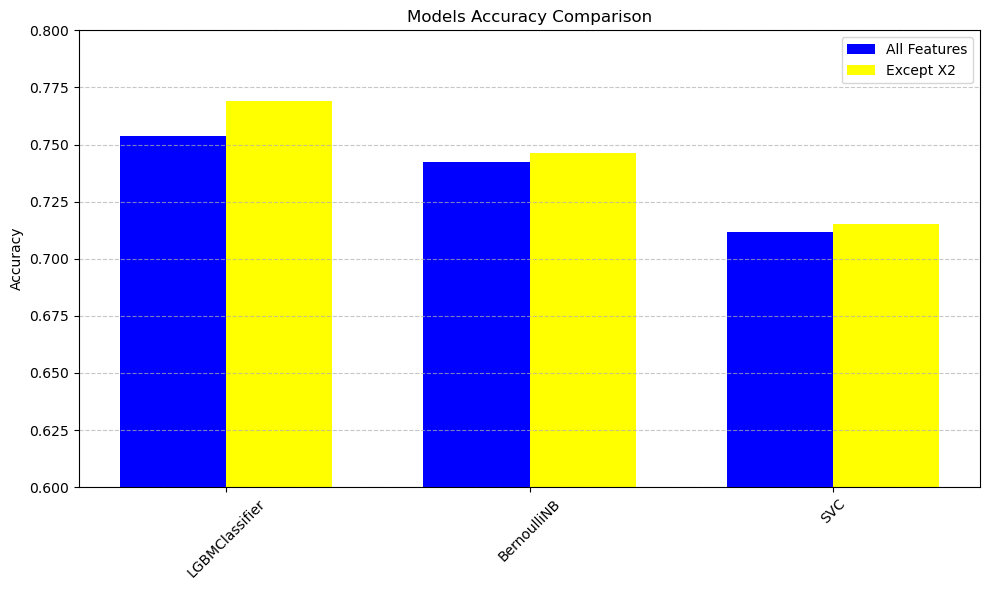

In [541]:
fig, ax = plt.subplots(figsize=(10, 6))
models = np.arange(len(three_best_all_features["Model"])) 
width = 0.35

# Create bar plots with blue and yellow colors
rec1 = ax.bar(models, three_best_all_features["Accuracy"], width, color="blue", label="All Features")
rec2 = ax.bar(models + width, three_best_all_features_except_x2["Accuracy"], width, color="yellow", label="Except X2")

# Set y-axis limits
ax.set_ylim(0.6, 0.8)

# Add labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Models Accuracy Comparison')
ax.set_xticks(models + width / 2)  # Center tick labels
ax.set_xticklabels(three_best_all_features["Model"], rotation=45, fontsize=10)

# Add legend
ax.legend()

# Add grid for better readability
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Based on our initial study of the mutual information between features and the output, we found that the feature X2 had the least impact on the model's predictions. To validate this finding, we ran the Lazy Prediction framework with and without the X2 feature. The figure above illustrates that, for the three best models we selected to proceed with, training on all features (including X2) resulted in worse performance compared to training without X2. This supports our conclusion that removing the X2 feature improves model performance.

### Bernoulli Naive Bayes
We train, BernulliNB on the entire dataset, Then, because of low accuracy, we decide to investigate more on input
features. By incorporating the recursive feature elimination technique, we found that the model can perform better
with three features X1,X3 and, X5. The best accuracy we achieve after hyperparameters optimization is 72.7%.


In [545]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [547]:
x= new_dataset.iloc[:,1:].values
y=new_dataset.iloc[:,0].values

In [549]:
new_dataset.iloc[:,1:].columns

Index(['X1', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [551]:
bnb_all_random_seeds_accuracy=[]
bnb_all_random_seeds_f1=[]
for state in random_states:
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=state)
    bnb_model = BernoulliNB()
    bnb_model.fit(X_train,Y_train)
    bnb_y_pred = bnb_model.predict(X_test)
    accuracy = accuracy_score(Y_test, bnb_y_pred)
    f1 = f1_score(Y_test, bnb_y_pred)
    bnb_all_random_seeds_accuracy.append(accuracy)
    bnb_all_random_seeds_f1.append(f1)

In [553]:
sum(bnb_all_random_seeds_accuracy)/len(bnb_all_random_seeds_accuracy)

0.6269230769230769

In [555]:
bnb_all_random_seeds_f1
sum(bnb_all_random_seeds_f1)/len(bnb_all_random_seeds_f1)

0.7691457644265358

In [557]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [565]:
results_df = pd.DataFrame(columns=["Random_State", "Alpha", "Binarize", "Accuracy", "F1_Score", "Num_Features", "Deleted_Features"])

# Perform RFE once on the full dataset
selector = RFE(LogisticRegression(max_iter=1000,verbose=0), n_features_to_select=3)  # Select top 10 features
X_selected = selector.fit_transform(x, y)

# Identify deleted features
feature_names = list(range(x.shape[1]))  # Assuming features are numbered 0, 1, ..., n
selected_features = np.array(feature_names)[selector.support_]
deleted_features = np.array(feature_names)[~selector.support_]

# Scale the selected features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_selected)

# Define the hyperparameter search space
search_space = {
    'alpha': hp.uniform('alpha', 0.01, 10),  # Smoothing parameter
    'binarize': hp.uniform('binarize', 0.0, 1.0)  # Threshold for binarizing scaled features
}


for state in random_states:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=state
    )
    
    # Objective function to minimize
    def objective(params):
        model = BernoulliNB(alpha=params['alpha'], binarize=params['binarize'])
        score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
        return {'loss': -score, 'status': STATUS_OK}

    # Run Hyperopt optimization
    trials = Trials()
    best_params = fmin(
        fn=objective,
        space=search_space,
        algo=tpe.suggest,
        max_evals=50,  # Number of evaluations
        trials=trials
    )

    # Extract optimized hyperparameters
    alpha_opt = best_params['alpha']
    binarize_opt = best_params['binarize']

    # Train the best model with optimized hyperparameters
    best_model = BernoulliNB(alpha=alpha_opt, binarize=binarize_opt)
    best_model.fit(X_train, y_train)

    # Make predictions and calculate metrics
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results to the DataFrame using pd.concat()
    new_row = pd.DataFrame({
        "Random_State": [state],
        "Alpha": [alpha_opt],
        "Binarize": [binarize_opt],
        "Accuracy": [accuracy],
        "F1_Score": [f1],
        "Num_Features": [X_train.shape[1]],
        "Deleted_Features": [list(deleted_features)]
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
print("Results DataFrame:")
print(results_df)

# Calculate averages
average_accuracy = results_df["Accuracy"].mean()
average_f1 = results_df["F1_Score"].mean()

print(f"\nAverage Accuracy: {average_accuracy:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")
print(f"\nDeleted Features: {new_dataset.iloc[:,1:].columns[deleted_features]}")

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001800 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001011 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.540000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.570000


  8%|█████                                                          | 4/50 [00:00<00:01, 34.11trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001137 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000998 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001068 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.600000


 16%|██████████                                                     | 8/50 [00:00<00:01, 36.81trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001011 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001011 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.004886 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001241 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.600000


 28%|█████████████████▎                                            | 14/50 [00:00<00:00, 44.94trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001024 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001123 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001010 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001143 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.600000


 42%|██████████████████████████                                    | 21/50 [00:00<00:00, 51.31trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001468 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000448 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001008 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000515 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.600000


 56%|██████████████████████████████████▋                           | 28/50 [00:00<00:00, 55.49trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000878 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001108 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001247 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.600000


 70%|███████████████████████████████████████████▍                  | 35/50 [00:00<00:00, 58.57trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000322 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001012 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001477 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001247 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.600000


 82%|██████████████████████████████████████████████████▊           | 41/50 [00:00<00:00, 58.87trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001095 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000225 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.002126 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001009 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001849 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000506 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.600000


 96%|███████████████████████████████████████████████████████████▌  | 48/50 [00:00<00:00, 60.05trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000564 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.003729 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.600000


  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001186 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000299 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001009 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001014 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.610000
INF

 18%|████████▋                                       | 9/50 [00:00<00:00, 80.95trial/s, best loss: -0.6100000000000001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001143 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001732 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001236 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001050 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.003264 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 

 36%|████████████████▉                              | 18/50 [00:00<00:00, 77.36trial/s, best loss: -0.6100000000000001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000974 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.004265 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000331 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.002429 seconds
INFO:hyperopt.tpe:TPE usin

 52%|████████████████████████▍                      | 26/50 [00:00<00:00, 73.84trial/s, best loss: -0.6100000000000001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000504 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001008 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE usin

 68%|███████████████████████████████▉               | 34/50 [00:00<00:00, 69.73trial/s, best loss: -0.6100000000000001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000504 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000999 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001010 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.610000


 82%|██████████████████████████████████████▌        | 41/50 [00:00<00:00, 67.90trial/s, best loss: -0.6100000000000001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001009 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001022 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.002508 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.610000


 96%|█████████████████████████████████████████████  | 48/50 [00:00<00:00, 67.95trial/s, best loss: -0.6100000000000001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.003008 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.610000


  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001663 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.510000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.530000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.530000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.002509 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.580000


 16%|█████████▉                                                    | 8/50 [00:00<00:00, 73.38trial/s, best loss: -0.58]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.002093 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000506 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 15

 32%|███████████████                                | 16/50 [00:00<00:00, 75.08trial/s, best loss: -0.5800000000000001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001024 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001025 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE usin

 48%|█████████████████████████████▊                                | 24/50 [00:00<00:00, 72.46trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001007 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000512 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE usin

 64%|███████████████████████████████████████▋                      | 32/50 [00:00<00:00, 70.73trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000056 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001014 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE usin

 80%|█████████████████████████████████████████████████▌            | 40/50 [00:00<00:00, 69.39trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001459 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000504 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001055 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.600000


 94%|██████████████████████████████████████████████████████████▎   | 47/50 [00:00<00:00, 69.40trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003490 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.002843 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.600000


  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001058 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001023 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001008 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.570000


 16%|█████████▉                                                    | 8/50 [00:00<00:00, 75.22trial/s, best loss: -0.57]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001006 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001247 seconds
INFO:hyperopt.tpe:TPE using 15

 32%|███████████████████▌                                         | 16/50 [00:00<00:00, 73.82trial/s, best loss: -0.57]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001002 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000162 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000558 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000506 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001011 seconds
INFO:hyperopt.tpe:TPE usin

 48%|█████████████████████████████▎                               | 24/50 [00:00<00:00, 73.48trial/s, best loss: -0.57]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001053 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001031 seconds
INFO:hyperopt.tpe:TPE usin

 64%|███████████████████████████████████████                      | 32/50 [00:00<00:00, 71.72trial/s, best loss: -0.57]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000598 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001010 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000504 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000255 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE usin

 80%|████████████████████████████████████████████████▊            | 40/50 [00:00<00:00, 70.97trial/s, best loss: -0.57]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001009 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001003 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001175 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000197 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000519 seconds
INFO:hyperopt.tpe:TPE usin

 96%|██████████████████████████████████████████████████████████▌  | 48/50 [00:00<00:00, 71.28trial/s, best loss: -0.57]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001505 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000504 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.570000


  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.550000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000508 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000670 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.600000


 16%|██████████                                                     | 8/50 [00:00<00:00, 77.42trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001002 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001127 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001009 seconds
INFO:hyperopt.tpe:TPE using 15

 34%|█████████████████████                                         | 17/50 [00:00<00:00, 79.24trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001307 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001006 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000504 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001003 seconds
INFO:hyperopt.tpe:TPE usin

 50%|███████████████████████████████                               | 25/50 [00:00<00:00, 76.05trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001321 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001056 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000993 seconds
INFO:hyperopt.tpe:TPE usin

 66%|████████████████████████████████████████▉                     | 33/50 [00:00<00:00, 73.45trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001005 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000134 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000517 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000998 seconds
INFO:hyperopt.tpe:TPE usin

 82%|██████████████████████████████████████████████████▊           | 41/50 [00:00<00:00, 72.06trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000997 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001505 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000196 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001002 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001007 seconds
INFO:hyperopt.tpe:TPE usin

 98%|████████████████████████████████████████████████████████████▊ | 49/50 [00:00<00:00, 71.28trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000997 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.600000


  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.540000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.540000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.540000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.540000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000999 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.570000
INF

 18%|███████████▏                                                  | 9/50 [00:00<00:00, 84.86trial/s, best loss: -0.57]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000513 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001505 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001310 seconds
INFO:hyperopt.tpe:TPE using 

 36%|█████████████████████▉                                       | 18/50 [00:00<00:00, 79.49trial/s, best loss: -0.57]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000998 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001010 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001373 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE usin

 52%|███████████████████████████████▋                             | 26/50 [00:00<00:00, 71.36trial/s, best loss: -0.57]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000759 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE usin

 68%|█████████████████████████████████████████▍                   | 34/50 [00:00<00:00, 67.32trial/s, best loss: -0.57]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001003 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001162 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.570000


 82%|██████████████████████████████████████████████████           | 41/50 [00:00<00:00, 67.46trial/s, best loss: -0.57]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000999 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001211 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.004095 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001272 seconds
INFO:hyperopt.tpe:TPE usin

 98%|███████████████████████████████████████████████████████████▊ | 49/50 [00:00<00:00, 69.30trial/s, best loss: -0.57]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001024 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.570000


  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002006 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.530000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.530000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.530000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.530000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.530000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000505 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.530000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000808 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.580000


 16%|█████████▉                                                    | 8/50 [00:00<00:00, 77.24trial/s, best loss: -0.58]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001226 seconds
INFO:hyperopt.tpe:TPE using 15

 32%|███████████████████▊                                          | 16/50 [00:00<00:00, 77.26trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000310 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000998 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001002 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000994 seconds
INFO:hyperopt.tpe:TPE usin

 48%|█████████████████████████████▊                                | 24/50 [00:00<00:00, 74.92trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001082 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001008 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000997 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000640 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE usin

 64%|███████████████████████████████████████▋                      | 32/50 [00:00<00:00, 75.64trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001011 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000999 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000998 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000663 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000508 seconds
INFO:hyperopt.tpe:TPE usin

 80%|█████████████████████████████████████████████████▌            | 40/50 [00:00<00:00, 73.71trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000188 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001218 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000744 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.003995 seconds
INFO:hyperopt.tpe:TPE usin

 96%|███████████████████████████████████████████████████████████▌  | 48/50 [00:00<00:00, 69.13trial/s, best loss: -0.6]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.600000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.600000


  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001059 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001055 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.510000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.520000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.520000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001066 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001009 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.610000


 16%|█████████▉                                                    | 8/50 [00:00<00:00, 71.39trial/s, best loss: -0.61]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001106 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000992 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 15

 32%|███████████████████▌                                         | 16/50 [00:00<00:00, 73.27trial/s, best loss: -0.61]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000999 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001009 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE usin

 48%|█████████████████████████████▎                               | 24/50 [00:00<00:00, 74.26trial/s, best loss: -0.61]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000997 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000343 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001006 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000086 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000242 seconds
INFO:hyperopt.tpe:TPE usin

 64%|███████████████████████████████████████                      | 32/50 [00:00<00:00, 74.51trial/s, best loss: -0.61]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001005 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001007 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001007 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE usin

 80%|████████████████████████████████████████████████▊            | 40/50 [00:00<00:00, 72.96trial/s, best loss: -0.61]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001003 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001009 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001006 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001010 seconds
INFO:hyperopt.tpe:TPE usin

 96%|██████████████████████████████████████████████████████████▌  | 48/50 [00:00<00:00, 73.14trial/s, best loss: -0.61]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001003 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.610000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.610000


  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000336 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.570000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000504 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001037 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.580000
INF

 18%|████████▋                                       | 9/50 [00:00<00:00, 88.11trial/s, best loss: -0.5800000000000001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001027 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000267 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000342 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 

 36%|████████████████▉                              | 18/50 [00:00<00:00, 88.06trial/s, best loss: -0.5800000000000001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000998 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001318 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001019 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001011 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE usin

 54%|█████████████████████████▍                     | 27/50 [00:00<00:00, 81.64trial/s, best loss: -0.5800000000000001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001007 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000644 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000999 seconds
INFO:hyperopt.tpe:TPE usin

 72%|█████████████████████████████████▊             | 36/50 [00:00<00:00, 75.92trial/s, best loss: -0.5800000000000001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001509 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001012 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000995 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000504 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000626 seconds
INFO:hyperopt.tpe:TPE usin

 88%|█████████████████████████████████████████▎     | 44/50 [00:00<00:00, 75.72trial/s, best loss: -0.5800000000000001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001060 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000535 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.580000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000999 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.580000


  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002260 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001541 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001008 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001035 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000507 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001508 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.620000
INF

 18%|████████▋                                       | 9/50 [00:00<00:00, 80.25trial/s, best loss: -0.6199999999999999]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000865 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001007 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001010 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000705 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001009 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001008 seconds
INFO:hyperopt.tpe:TPE using 

 36%|████████████████▉                              | 18/50 [00:00<00:00, 83.17trial/s, best loss: -0.6199999999999999]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000577 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000562 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000685 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001008 seconds
INFO:hyperopt.tpe:TPE usin

 54%|█████████████████████████▍                     | 27/50 [00:00<00:00, 77.35trial/s, best loss: -0.6199999999999999]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000521 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001505 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001002 seconds
INFO:hyperopt.tpe:TPE usin

 70%|████████████████████████████████▉              | 35/50 [00:00<00:00, 75.87trial/s, best loss: -0.6199999999999999]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001003 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000998 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE usin

 86%|████████████████████████████████████████▍      | 43/50 [00:00<00:00, 74.48trial/s, best loss: -0.6199999999999999]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001012 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001007 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.620000
INFO:hyperopt.tpe:build_posterior_wrapper took 0.000999 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.620000


100%|███████████████████████████████████████████████| 50/50 [00:00<00:00, 75.05trial/s, best loss: -0.6199999999999999]
Results DataFrame:
  Random_State  Alpha  Binarize  Accuracy  F1_Score Num_Features  \
0          392   1.66      0.95      0.73      0.79            3   
1          406   8.16      0.79      0.69      0.76            3   
2          393   1.26      0.76      0.73      0.79            3   
3          221   2.72      0.79      0.85      0.87            3   
4          845   7.32      0.78      0.69      0.78            3   
5          638   2.51      0.45      0.65      0.78            3   
6          226   5.17      0.77      0.73      0.79            3   
7          958   1.53      0.99      0.69      0.76            3   
8          660   6.69      0.90      0.81      0.83            3   
9          491   5.66      1.00      0.69      0.69            3   

  Deleted_Features  
0           [2, 4]  
1           [2, 4]  
2           [2, 4]  
3           [2, 4]  
4      

### LGBM Classifier

We train LGBM Classifier with entire dataset and achieve the best accuracy of 76.5%. Unfortunately, we could
not increase the accuracy by using the recursive feature elimination.

In [384]:
x= new_dataset.iloc[:,1:].values
y=new_dataset.iloc[:,0].values

In [386]:
from lightgbm import LGBMClassifier

In [415]:
lgbm_all_random_seeds_accuracy=[]
lgbm_all_random_seeds_f1=[]
for state in random_states:
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=state)
    lgbm_model = LGBMClassifier(verbose=-100,n_estimators=100,learning_rate=0.1,max_depth=-1,num_leaves=31,subsample=0.8,colsample_bytree=0.8,random_state=state)
    lgbm_model.fit(X_train,Y_train)
    lgbm_y_pred = lgbm_model.predict(X_test)
    accuracy = accuracy_score(Y_test, lgbm_y_pred)
    f1 = f1_score(Y_test, lgbm_y_pred)
    lgbm_all_random_seeds_accuracy.append(accuracy)
    lgbm_all_random_seeds_f1.append(f1)

In [390]:
sum(lgbm_all_random_seeds_accuracy)/len(lgbm_all_random_seeds_accuracy)

0.7653846153846154

In [392]:
sum(lgbm_all_random_seeds_f1)/len(lgbm_all_random_seeds_f1)

0.7990985345914188

#### from lightgbm import LGBMClassifier

    

In [413]:
from sklearn.feature_selection import RFE
all_seeds_features=pd.DataFrame(columns=["Random Seed","X1","X3","X4","X5","X6","Accuracy"])
for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    lgbm=LGBMClassifier(verbose=-100,random_state=state)
    rfe=RFE(estimator=lgbm,n_features_to_select=4,step=4)
    rfe.fit(X_train,y_train)
    selected_features=rfe.support_
    ranking=rfe.ranking_
    x_train_rfe=rfe.transform(X_train)
    x_test_rfe=rfe.transform(X_test)
    lgbm.fit(x_train_rfe,y_train)
    y_pred=lgbm.predict(x_test_rfe)
    accuracy=accuracy_score(y_test,y_pred)
    print("Selected Features (True indicates selected):", type(selected_features))
    print("Feature Ranking (1 indicates selected):", ranking)
    print("Accuracy with selected features:", accuracy)
    seeds_row=[{"Random Seed":state, "X1":selected_features[0],"X3":selected_features[1],"X4":selected_features[2],"X5":selected_features[3],"X6":selected_features[4],
                "Accuracy":accuracy}]
    print(seeds_row)
    print("-----------------------------")
    all_seeds_features=pd.concat([all_seeds_features,pd.DataFrame(seeds_row)],ignore_index=True)

Selected Features (True indicates selected): <class 'numpy.ndarray'>
Feature Ranking (1 indicates selected): [1 2 1 1 1]
Accuracy with selected features: 0.6153846153846154
[{'Random Seed': 392, 'X1': True, 'X3': False, 'X4': True, 'X5': True, 'X6': True, 'Accuracy': 0.6153846153846154}]
-----------------------------
Selected Features (True indicates selected): <class 'numpy.ndarray'>
Feature Ranking (1 indicates selected): [1 2 1 1 1]
Accuracy with selected features: 0.6153846153846154
[{'Random Seed': 406, 'X1': True, 'X3': False, 'X4': True, 'X5': True, 'X6': True, 'Accuracy': 0.6153846153846154}]
-----------------------------
Selected Features (True indicates selected): <class 'numpy.ndarray'>
Feature Ranking (1 indicates selected): [1 2 1 1 1]
Accuracy with selected features: 0.6153846153846154
[{'Random Seed': 393, 'X1': True, 'X3': False, 'X4': True, 'X5': True, 'X6': True, 'Accuracy': 0.6153846153846154}]
-----------------------------
Selected Features (True indicates selected)

In [397]:
all_seeds_features

,Random Seed,X1,X3,X4,X5,X6,Accuracy
0,392,True,False,True,True,True,0.62
1,406,True,False,True,True,True,0.62
2,393,True,False,True,True,True,0.62
3,221,True,False,True,True,True,0.62
4,845,True,False,True,True,True,0.62
5,638,True,False,True,True,True,0.62
6,226,True,False,True,True,True,0.62
7,958,True,False,True,True,True,0.62
8,660,True,False,True,True,True,0.62
9,491,True,False,True,True,True,0.62


Recursive Feature Elimination (RFE) using LGBMClassifier has demonstrated that all the remaining features are essential. Therefore, we will retain all five remaining features.

In [400]:
!pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable


In [401]:
### Hyperparameter tuning using HyperOpt
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score


### Support Vector Machine
We train, SVC on the entire dataset, Then, because of low accuracy, we decide to investigate more on input
features. By incorporating the recursive feature elimination technique, we found that the model can perform better
with three features X1,X3 and, X5. The best accuracy we achieve after hyperparameters optimization is 72.7%.

In [405]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [407]:
results_df = pd.DataFrame(columns=["Random_State", "Accuracy", "F1_Score"])

# Loop over different random states
for state in random_states:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, random_state=state
    )
    
    # Scale the features using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train an SVC model
    svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=state)
    svc.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = svc.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({
        "Random_State": [state],
        "Accuracy": [accuracy],
        "F1_Score": [f1]
    })], ignore_index=True)

# Display the results DataFrame
print("Results DataFrame:")
print(results_df)

# Calculate and print averages
average_accuracy = results_df["Accuracy"].mean()
average_f1 = results_df["F1_Score"].mean()

print(f"\nAverage Accuracy: {average_accuracy:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Results DataFrame:
  Random_State  Accuracy  F1_Score
0          392      0.73      0.77
1          406      0.73      0.77
2          393      0.73      0.77
3          221      0.69      0.76
4          845      0.65      0.73
5          638      0.73      0.79
6          226      0.62      0.69
7          958      0.65      0.73
8          660      0.69      0.75
9          491      0.69      0.67

Average Accuracy: 0.6923
Average F1 Score: 0.7434


In [409]:
results_df = pd.DataFrame(columns=["Random_State", "Best_C", "Best_Gamma", "Accuracy", "F1_Score", "Deleted_Features"])

# Perform RFE for feature selection on the entire dataset
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=3)  # Select top 10 features
X_selected = selector.fit_transform(x, y)

# Identify deleted features
feature_names = list(range(x.shape[1]))  # Assuming features are numbered 0, 1, ..., n
selected_features = list(np.array(feature_names)[selector.support_])
deleted_features = list(np.array(feature_names)[~selector.support_])

# Loop over different random states
for state in random_states:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=state
    )
    
    # Scale the features using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the hyperparameter grid for SVC
    param_grid = {
        "C": [0.1, 1, 10],  # Regularization parameter
        "gamma": ["scale", 0.1, 1, 10],  # Kernel coefficient
        "kernel": ["rbf"]  # Use RBF kernel
    }

    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(
        SVC(random_state=state),
        param_grid,
        scoring="accuracy",
        cv=5,  # 5-fold cross-validation
        n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameters and train the final model
    best_params = grid_search.best_params_
    best_svc = grid_search.best_estimator_

    # Make predictions
    y_pred = best_svc.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results to the DataFrame
    new_row = pd.DataFrame({
        "Random_State": [state],
        "Best_C": [best_params["C"]],
        "Best_Gamma": [best_params["gamma"]],
        "Accuracy": [accuracy],
        "F1_Score": [f1],
        "Deleted_Features": [deleted_features]
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
print("Results DataFrame:")
print(results_df)

# Calculate and print averages
average_accuracy = results_df["Accuracy"].mean()
average_f1 = results_df["F1_Score"].mean()

print(f"\nAverage Accuracy: {average_accuracy:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")
print(f"\nDeleted Features: {new_dataset.iloc[:,1:].columns[deleted_features]}")

Results DataFrame:
  Random_State Best_C Best_Gamma  Accuracy  F1_Score Deleted_Features
0          392      1      scale      0.77      0.80           [2, 4]
1          406     10         10      0.73      0.79           [2, 4]
2          393     10         10      0.77      0.83           [2, 4]
3          221     10         10      0.65      0.73           [2, 4]
4          845      1         10      0.77      0.81           [2, 4]
5          638      1       0.10      0.73      0.84           [2, 4]
6          226      1      scale      0.73      0.76           [2, 4]
7          958      1          1      0.73      0.79           [2, 4]
8          660      1         10      0.65      0.71           [2, 4]
9          491     10       0.10      0.73      0.72           [2, 4]

Average Accuracy: 0.7269
Average F1 Score: 0.7774

Deleted Features: Index(['X4', 'X6'], dtype='object')
